**HW2: ABCD METHOD**  
Jeffrey Patrick PHYS 427

$\frac{A}{C} = \frac{B}{D}    if    f(x,y) = f_1(x)*f_2(y)$

If N is the number of hits in a block A, B, C, or D then:

$N_A = \int_y^1 \int_x^1 f_1(x)f_2(y)dxdy$  
$N_B = \int_y^1 \int_0^x f_1(x)f_2(y)dxdy$  
$N_C = \int_0^y \int_x^1 f_1(x)f_2(y)dxdy$  
$N_D = \int_0^y \int_0^x f_1(x)f_2(y)dxdy$  

$N_A = (F_1(1) - F_1(x))*(F_2(1) - F_2(y))$   
$N_B = (F_1(x) - F_1(0))*(F_2(1) - F_2(y))$  
$N_C = (F_1(1) - F_1(x))*(F_2(y) - F_2(0))$  
$N_D = (F_1(x) - F_1(0))*(F_2(y) - F_2(0))$  

$\frac{(F_1(1) - F_1(x))*(F_2(1) - F_2(y))}{(F_1(1) - F_1(x))*(F_2(y) - F_2(0))} = \frac{(F_1(x) - F_1(0))*(F_2(1) - F_2(y))}{(F_1(x) - F_1(0))*(F_2(y) - F_2(0))}$

$\frac{F_2(1) - F_2(y)}{F_2(y)-F_2(0)} = \frac{F_2(1) - F_2(y)}{F_2(y) - F_2(0)}$



In [123]:
import numpy as np
import matplotlib.pyplot as plt

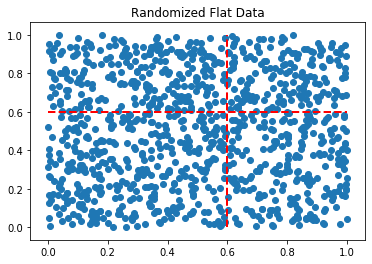

In [124]:
#creating randomized flat data split into A, B, C, and D blocks by lines x=0.6 and y=0.6
#Going clockwise starting from the top right, quadrants are: A, C, B, D

x = np.random.uniform(0,1,1000)
y = np.random.uniform(0,1,1000)
ax = plt.scatter(x,y)
plt.plot([0.6,0.6], [0,1], "r--", lw=2)
plt.plot([0,1], [0.6,0.6], "r--", lw=2)
plt.title('Randomized Flat Data')
plt.show()


In [130]:
#(B/D)=(A/C) if f(x,y)=f(x,y)
#count number of hits in each square by creating a function f(x,y)

def f_gen(max):
    n = 0
    while (n < max):
        x = np.random.uniform(0,1,1000)
        y = np.random.uniform(0,1,1000)
        
        A = np.where((x>0.6) & (y>0.6), 1, 0)
        A_count = np.count_nonzero(A)

        B = np.where((x<0.6) & (y>0.6), 1, 0)
        B_count = np.count_nonzero(B)

        C = np.where((x>0.6) & (y<0.6), 1, 0)
        C_count = np.count_nonzero(C)

        D = np.where((x<0.6) & (y<0.6), 1, 0)
        D_count = np.count_nonzero(D)
    
        predA = ((B_count)/(D_count))*C_count
        diffA = A_count - predA
        yield diffA
        n += 1
    
    
#difference between expected A and predicted A for 1 iteration.
diff1 = (i for i in f_gen(1))
array_diff1 = []
for i in diff1:
    array_diff1.append(i)
    
print(array_diff1)

[22.769647696476966]


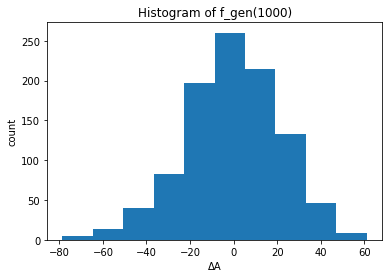

In [126]:
#creating histogram of 1000 differences. Iterate f_gen 1000 times.

array1 = (i for i in f_gen(1000))
array_diff = []
for i in array1:
    array_diff.append(i)
    
plt.hist(array_diff)
plt.title('Histogram of f_gen(1000)')
plt.ylabel('count')
plt.xlabel('\u0394A')

#DeltaA = actual_A - predicted_A
plt.show()


I would guess the histogram is Gaussian because we have a large amount of statistics, with 1000 events in both x and y.

In [127]:
#generator function as a function of z(# of events)
def f_gen2(max,z):
    
    n = 0
    while (n < max):
        x = np.random.uniform(0,1,z)
        y = np.random.uniform(0,1,z)
        
        A = np.where((x>0.6) & (y>0.6), 1, 0)
        A_count = np.count_nonzero(A)

        B = np.where((x<0.6) & (y>0.6), 1, 0)
        B_count = np.count_nonzero(B)

        C = np.where((x>0.6) & (y<0.6), 1, 0)
        C_count = np.count_nonzero(C)

        D = np.where((x<0.6) & (y<0.6), 1, 0)
        D_count = np.count_nonzero(D)
        
        if D_count == 0:
            n += 1
            continue
        else:
            predA = ((B_count)/(D_count))*C_count
         
        diffA = A_count - predA
        yield diffA
        n += 1
    

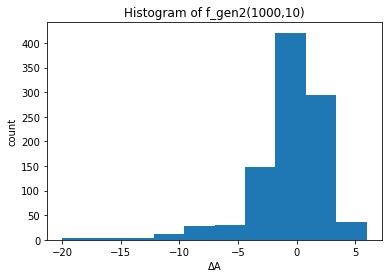

18


In [128]:
#Histogram of f_gen2 with 10 events for x and y and 1000 iterations
array2 = (i for i in f_gen2(1000,10))
array_diff2 = []
for i in array2:
    array_diff2.append(i)

plt.hist(array_diff2)
plt.ylabel('count')
plt.xlabel('\u0394A')
plt.title('Histogram of f_gen2(1000,10)')
plt.show()

#1000 minus the length of the array gives us the number of times the function failed.
print(1000 - len(array_diff2))
array10 = np.array(array_diff2)
array10_std = np.std(array10)


0
0


Text(0.5, 0, 'Statistics')

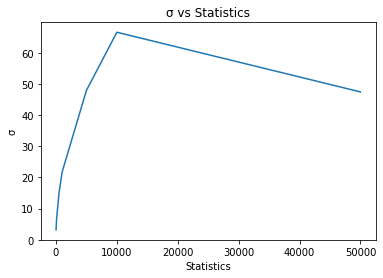

In [129]:
#Using f_gen2, created 7 arrays with different statistics each with 1000 iterations.
#100 events
array3 = (i for i in f_gen2(1000,100))
array_diff3 = []
for i in array3:
    array_diff3.append(i)
    
print(1000 - len(array_diff3))
array100 = np.array(array_diff3)
array100_std = np.std(array100)

#500 events
array4 = (i for i in f_gen2(1000,500))
array_diff4 = []
for i in array4:
    array_diff4.append(i)
    
print(1000 - len(array_diff4))
array500 = np.array(array_diff4)
array500_std = np.std(array500)

#1000 events
array5 = (i for i in f_gen2(1000,1000))
array_diff5 = []
for i in array5:
    array_diff5.append(i)

array1000 = np.array(array_diff5)
array1000_std = np.std(array1000)
    
#5000 events
array6 = (i for i in f_gen2(1000,5000))
array_diff6 = []
for i in array6:
    array_diff6.append(i) 
    
array5000 = np.array(array_diff6)
array5000_std = np.std(array5000) 

#10000 events
array7 = (i for i in f_gen2(1000,10000))
array_diff7 = []
for i in array7:
    array_diff7.append(i) 
    
array10000 = np.array(array_diff7)
array10000_std = np.std(array10000) 

#50000 events
array8 = (i for i in f_gen2(1000,5000))
array_diff8 = []
for i in array8:
    array_diff8.append(i) 
    
array50000 = np.array(array_diff8)
array50000_std = np.std(array50000) 

#place the 7 seperate arrays into 1 single array then plot it with respect to the statistics. 
totalarray_std = [array10_std, array100_std, array500_std, array1000_std, array5000_std, array10000_std, array50000_std]
z = [10, 100, 500, 1000, 5000, 10000, 50000]

plt.plot(z, totalarray_std)
plt.title('\u03C3 vs Statistics')
plt.ylabel('\u03C3')
plt.xlabel('Statistics')